# QuaSaR: Identifying EEW Rings - Shield Network and Fault Lines

[Quake Safe Rings](./1a_stations_faultlnes_plot.ipynb) - in our efforts to understand the station fault topology - we make use of the International Federation Data of Seismic Networks (FDSN), the global standard and a [data service](http://www.fdsn.org/services/) for sharing seismic sensor wave form data. The Obspy librarires support FDSN. The list of resources and services that are used for retrieving station inventory and waveform data.

In [1]:
'''
    WARNING CONTROL to display or ignore all warnings
'''
import warnings; warnings.simplefilter('default')     #switch betweeb 'default' and 'ignore'

# Overview of Seismographs
[A seismograph is characterize](https://www.src.com.au/choosing-an-earthquake-sensor/) by its combination of low noise, high resolution, wide input signal range, and quickness of sampling data points. Sensors were then designed to tell us about change in velocity over time – acceleration. Earthquake monitoring stations have two sensors to record: strong motion and weak motion. [These sensors tend to overlap in range](https://www.analog.com/en/analog-dialogue/articles/understanding-the-fundamentals-of-earthquake-signal-sensing-networks.html#), which allows us to record pretty much the full range of ground displacement. Geophone low cost velocity sensors are high frequency seismographs that can typically record signals that shake at around 5Hz (5 cycles per second) or faster. The focus is on motion sensors of type: _(i) accelerometer, (ii) broadband velocity, (iii) short period velocity, and (iv) GNSS_.

1. __Broadband seismometers__
   1. extremely sensitive devices record seismic energy across a large range of frequencies (100-200Hz) 
   1. usually record seismic velocity on three channels: up-down, east-west, and north-south
   1. capture very small ground motions that are induced by small local or regional earthquakes, or very distant earthquakes
   1. do not perform well in the large ground motions induced by strong or nearby earthquakes
   1. strong shaking will cause broadband seismometers to “clip”, or go off scale
   1. used for scientific purposes
1. __Strong-motion seismometers__
   1. do not excel at detecting the very faint seismic signals that are captured by broadbands
   1. have a large dynamic range, and can record even very large ground motions
   1. well-suited to engineering applications
   1. dense networks of these sensors will often be located in urban environments or around critical infrastructure
   1. able to record accelerations up to 2 times the earth’s acceleration due to gravity, or 2g (accelerometers can measure up to 3.5 g with a system noise level less than 1μg/√Hz)
   1. shakemap input into a model are able to estimate shaking intensity over a large region
1. __Weak-motion seismometers__
   1. Weak motion sensors can measure very low amplitude seismic signals with a noise level of less than 1ng/√Hz
1. __GNSS seismometers__
   1. do not clip in the presence of large ground motions
   1. they are useful for recording large, nearby earthquakes (like a strong-motion seismometer)
   1. record the full spectrum of earthquake ground motion
   1. unique in recording the non-elastic ground motion that occurs during a large earthquake


# Sensor code and type definitions
<a id='sensor_code_desc'></a>

An initiatl step for object 1.A is determining the the types of operational seismic sensors and their locations. GoeNet hosts wave forms for a multitude of [sensor types](https://api.geonet.org.nz/network/sensor/type) (e.g. tidle guages, pressure gauges, seismometers, GNSS antennas, barometers, Microphones, Hydrophones and so on).

The sensors location code is unique to each sensor type. Therefore, one may chose to use the location code prefix or sensor type enumerator to select the desired sensors; i.e. seimograph and accelerometer stations. The motion sensors are used in both earthquake and volcanic seismic activity monitoring and early warning.

Channel codes are defined in the GeoNet's [stream naming conventions](https://www.geonet.org.nz/data/supplementary/channels)

| Sensor types that are relevant to earthquake detection | Location codes reserved for the seismic sensors | Channel codes first letter sensor type sampling rate and sensor bandwidth | Channel codes second letter sensor type relevant to seismometers |
|------------------------- |------------------------- |------------------------- |------------------------- |
|1 - Accelerometer |1? - weak motion sensors |U - Ultra Long Period sampled at 0.01Hz, or SOH sampled at 0.01Hz |H - Weak motion sensor, e.g. measuring velocity |
|3 - Broadband Seismometer |2? - strong motion sensors |V - Very Long Period sampled at 0.1Hz, or SOH sampled at 0.1Hz |N - Strong motion sensor, e.g. measuring acceleration |
|4 - GNSS Antenna | |L - Broad band sampled at 1Hz, or SOH sampled at 1Hz |L - Low gain sensor, usually velocity |
|8 - Short Period Borehole Seismometer | |B - Broad band sampled at between 10 and 80 Hz, usually 10 or 50 Hz |M - Mass position, used for monitoring broadband sensors |
|9 - Short Period Seismometer | |S - Short-period sampled at between 10 and 80 Hz, usually 50 Hz | |
|10 - Strong Motion Sensor | |H - High Broad band sampled at or above 80Hz, generally 100 or 200 Hz | |
| | |E - Extremely Short-period sampled at or above 80Hz, generally 100 Hz | |

_Example_: NZ.ADCS.20.HN1

NZ   = New Zealand country code  
ADCS = Unique station code  
20   = 2* 'strong motion' sensor location  
HN1  = \*\*1 North-South direction channel  

# OBJECTIVE 1.A - ANALYZE THE STATION TOPOLOGY

The objective is to analyze the station topology for its potential in serving as a low-latency shield network rings. It is part of [objective 1 described in the introdution](0_Introductions.ipynb)

## Get list of valid stations
We make use of the ../lib/stations.py class methods to retrieve the station inventory data and present a summary of the retrieved data.

In [1]:
''' Get all stations  '''
import sys
sys.path.insert(1, '../lib')
import stations

try:
    cls_st = stations.station_data()
    __client = cls_st.get_client()
    st_list, invalid_st_list, _ = cls_st.get_stations(__client)
    if not st_list:
        raise TypeError

    print(f'In the inventory of {len(st_list)+len(invalid_st_list)} total station')
    print(f'There are {len(st_list)} active stations inside the geographic land boundaries.')
    print(f'and {len(invalid_st_list)} active stations outside the geographic land boundaries.')

except Exception as err:
    print("Error message:", err)    

/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


In the inventory of 454 total station
There are 451 active stations inside the geographic land boundaries.
and 3 active stations outside the geographic land boundaries.


## Plot of the Out of Bound Stations
There are three stations that are on Island far from the New Zealand north and south islands. They are situated on [Raoul Island](https://en.wikipedia.org/wiki/Raoul_Island) and [Pitt Island](https://en.wikipedia.org/wiki/Pitt_Island). These three stations are excluded from the list of active valid stations but might be invluded in the analysis when necessary.

/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Stations excluded from the valid active station inventory
[['CTZ', -43.73549, -176.61719], ['GLKZ', -29.26068, -177.918038], ['RIZ', -29.2449, -177.9289]]


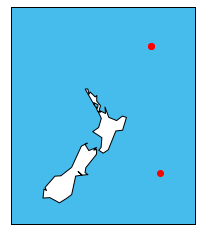

In [3]:
''' Plot the out of bounds stations '''

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

try:
    print('Stations excluded from the valid active station inventory')
    print(f'{invalid_st_list}')
    # determine range to print based on min, max lat and lon of the data
    st_lat = [x[1] for x in invalid_st_list]
    st_lon = [x[2] for x in invalid_st_list]

    lat_min = min(st_lat) - 5
    lat_max = max(st_lat) + 5
    lon_min = min(st_lon) - 20
    lon_max = max(st_lon) + 5

    # create map using BASEMAP
    m = Basemap(llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(lon_max-lon_min)/2,
                projection='merc',
                resolution = 'c',
                area_thresh=10000.,
                )
    
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color = 'white',lake_color='#46bcec')
    # convert lat and lon to map projection coordinates
    lons, lats = m(st_lon, st_lat)
    # plot points as red dots
#    plt.figure(figsize=(5, 5))
    m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
    plt.show()

except Exception as err:
    print("Error message:", err)

## Plot stations by sensor type
we plot all the valid land stations and color code them by type. The legend gives a description of the types, their capabilities, and quantities. The sensor types are distinguished between strong motion, weak motion, short-period, broadband, velocity measure, and acceleration measure. "[Not all ground motion sensors are created equal.](https://earthquake.alaska.edu/not-all-ground-motion-sensors-are-created-equal)" because not all ground motions are the same.

___TODO___ add google earth enging: 
* https://github.com/shiweihappy/earthengine-py-notebooks
* https://medium.com/@giswqs/300-jupyter-python-notebooks-for-using-google-earth-engine-with-interactive-mapping-bc3443119377 

### Observations about the sensor placement
Geonet has 5 types of sensors placed in various toplogical configurations. The plot shows that
* The shield network is, primarly, dominated by 59% strong mostion high broadband sensors measuring acceleration at high sampling rate 100-200Hz and, secondly, by 36% weak motion sensors measuring velocity at an extremely short-period sampling rate ~100Hz.
* A large propotion of weak motion sensors and the four broadband sensors, measuring acceleration at a very low sampling rate (1Hz), are placed in the northern island.
* The weak motion sensors, measuring velocity at a low sampling rate (1Hz). are uniformly scattered across both the northern and southern islands, except for the conscentration of sensors around the location -39.5, 175.5.
* Also the weak motion sensors measuring velocity high broadband sampled at 100-200Hz, are uniformaly scatter but concentrated in mostly to the north of latitude -44.0. There are two denser concentration of sensors around locations -38.5, 175.5 and -39.6, 176.5

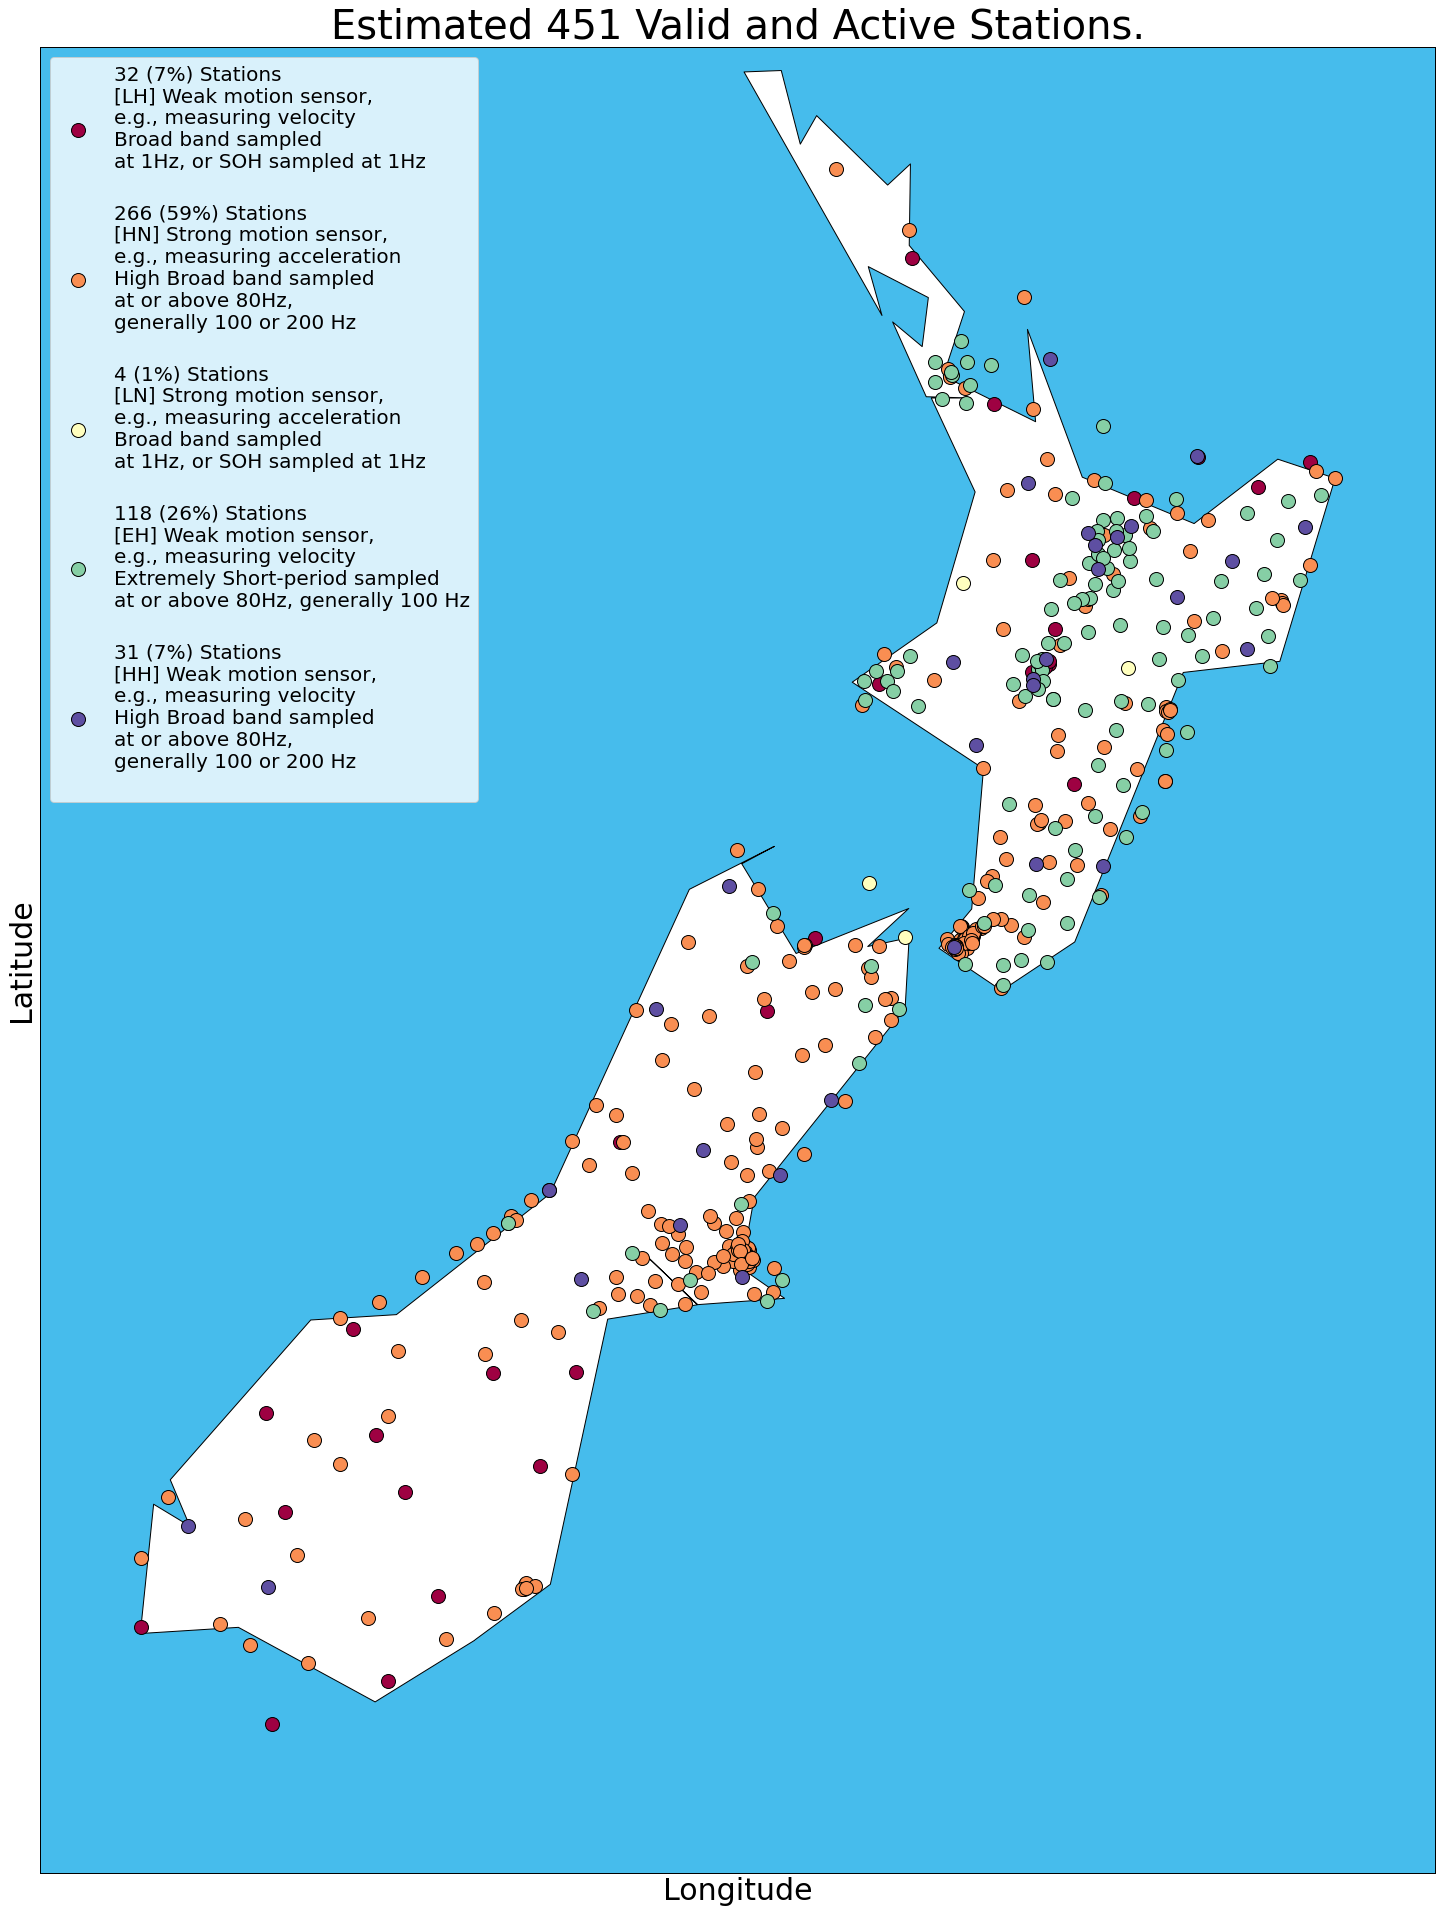

In [7]:
'''
    Topological plot of the staions by type
'''
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.lines import Line2D
from mpl_toolkits.basemap import Basemap

lstStationType = []
lstStationLoc = []

''' prepare the list data of station types and coorinate '''
for _,st_type,st_lat,st_lon in st_list:
    lstStationType.append(st_type)
    lstStationLoc.append([st_lat,st_lon])
arrStationLoc = np.array(lstStationLoc)
st_type_dict = cls_st.get_types()

core_samples_mask = np.zeros_like(lstStationType, dtype=bool)
core_samples_mask[0:sum([len(x) for x in lstStationType])] = True

''' assign the color codes to the unique station types '''
unique_st_types = set(lstStationType)
colors = [plt.cm.Spectral(each) 
          for each in np.linspace(0, 1, len(unique_st_types))]

st_lat = [x[0] for x in lstStationLoc]
st_lon = [x[1] for x in lstStationLoc]

lat_min = min(st_lat) - 1
lat_max = max(st_lat) + 1
lon_min = min(st_lon) - 1
lon_max = max(st_lon) + 1

# create map using BASEMAP
plt.figure(figsize=(25, 40))
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'c',
            area_thresh=10000.,
           )
    
m.drawcoastlines()
m.drawcountries()
#m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')

''' Begin plotting the color coded stations '''
#plt.figure(figsize=(30, 40))
for k, col in zip(unique_st_types, colors):
    class_member_mask = (np.array(lstStationType) == k)
    xy = arrStationLoc[class_member_mask & core_samples_mask]
    s_legend = str(len(xy))+' ('+str(round(100*len(xy)/len(st_list)))+'%) Stations\n['+k+'] '+str(st_type_dict[k]+'\n')
    x,y = m(xy[:, 1], xy[:, 0])
    m.plot(x, y, 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14, label=s_legend)
#    m.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
#             markeredgecolor='k', markersize=14, label=s_legend)
    
plt.title('Estimated %d Valid and Active Stations.' % len(arrStationLoc), fontsize=40)
plt.xlabel('Longitude', fontsize=30)
plt.ylabel('Latitude', fontsize=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(loc='upper left', fontsize=20)
plt.show()

### Cluster Stations
One of the spatial clustering categories from GIS theory and technology tools, for objects with spatial geographical coordinates, a [cluster is an object of the spatial proximity base](https://ieeexplore.ieee.org/document/7529539) rather than as a clustering property similarity.
The objective is to find clusters of stations that are with a given proximity to each other. The intent is to decide whether these stations, if they were able to communicate with each other, would conform to the properties of EEW rings. There are [several clustering methods](https://medium.com/locale-ai/geospatial-clustering-types-and-use-cases-6caedecfc7f0) that can be employed for grouping data with similar features. For the purpose of our exercise of clustering spatial data, partition clustering: [k-means](https://www.analyticsvidhya.com/blog/2021/02/simple-explanation-to-understand-k-means-clustering/), [k-medoids](https://www.geeksforgeeks.org/ml-k-medoids-clustering-with-example/), or [CLARA](https://medium.com/analytics-vidhya/partitional-clustering-using-clarans-method-with-python-example-545dd84e58b4) (Classification Large Application) [are unsuitable](https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/). Moreover, we would prefer a clustering algorithm that produce as many clusters as based on the proximity criteria rather than grouping points the generate a desired "k" number of clusters. We are not interested in hierarchical clustering, such as [Agglomerative](https://medium.com/@MaheshGadakari/hierarchical-agglomerative-clustering-hac-with-single-linkage-method-1159fa623d52) or [Divisive](https://arxiv.org/pdf/1506.08977.pdf) hierarchical clustering that are also designed to generate a specified number of clusters.

[DENCLUE](https://link.springer.com/chapter/10.1007/978-3-540-74825-0_7) is good for large dimensional data sets. It employs a hill climbing technique to estaimte the local optima. Since we are working only with geospatial data with latitude and longitude coordinates, we don't need to use denclue. If anyone wishes to implement, there's a [buggy version of denclue2](https://github.com/mgarrett57/DENCLUE) that can be repurposed.


[Around the equator the results should be fairly accurate.](https://stackoverflow.com/questions/24762435/clustering-geo-location-coordinates-lat-long-pairs-using-kmeans-algorithm-with) Close to one of the poles the results won't be useful at all. It might, however, work as a pre-pocessing step or for applications with low precision requirements, e.g. small, non-overlapping and very distinct clusters.


In [2]:
''' Only apply to strong and weak motion stations with sampling rates > 80Hz
    Convert the data as an Numpy array before clustering
    
    lst_st_type_80Hz_above: list of stations types with sampling rate > 80Hz
    lst_st_coord_80H_above: new station list of type in lst_st_type_80Hz_above
    station_coordinates: are the preprocessed array ready for clustering
'''

import numpy as np

lst_st_type_80Hz_above = ['HN', 'HH', 'EH']
lst_st_coord_80H_above = [[st_lat,st_lon] 
                          for _,st_type,st_lat,st_lon in st_list 
                          if st_type in lst_st_type_80Hz_above]

''' Convert to float to avoid throwing a datatype error in the plot function '''
#station_coordinates = np.array(lstStationLoc).astype(np.float)
station_coordinates = np.array(lst_st_coord_80H_above).astype(np.float)
print('%d stations of type %s are ready for clustering' % (len(station_coordinates),lst_st_type_80Hz_above))

415 stations of type ['HN', 'HH', 'EH'] are ready for clustering


### Spatial Clustering Methods

#### DBSCAN
DBSCAN is the most appropriate clustering method because, as in this case, it is mostly used for ___clustering in planar space___ and is good for handling outliers. Unlike k-means clustering that considers the variance, DBSCAN considers a distance function. The objective is to cluster stations with a maximum distance between each other. Inherent ___problem of DBSCAN___ is that it characterises data points to be in the same clusted if pair-wise data points satisfy the epsilon condition. This would not adequately satisfy the required condition that all data points in a a cluster are within the desired epsilon distance. It uses the concept of density reachability and density connectivity.

#### HDBSCAN

Density-Based Clustering Based on Hierarchical Density Estimates [HDBSCAN](https://link.springer.com/chapter/10.1007%2F978-3-642-37456-2_14) was developed by Campello, Moulavi, and Sander (2013) - a simplified tree of significant clusters are constructed for obtaining a “flat” partition consisting of only the most significant clusters (possibly corresponding to different density thresholds). [How HDBSCAN works](https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html) is "it extends DBSCAN by converting it into a hierarchical clustering algorithm, and then using a technique to extract a flat clustering based in the stability of clusters."

#### OPTICS

Ordering points to identify the clustering structure [OPTICS](https://towardsdatascience.com/clustering-using-optics-cac1d10ed7a7) - Another interesting aspect of the OPTICS algorithm is an extension of it used for outlier detection, called OPTICS-OF (OF for Outlier Factor). This will give an outlier score to each point, that is a comparison to its closest neighbors rather than the entire set. One downfall of OPTICS-OF detection is that is cannot handle duplicates well. If enough points occupy the same space, they can have a reach-ability distance of 0, which causes problems in our local outlier factor calculations. 

#### TODO

Apply CLARA to identify minimal set of clusters that cover to see what region it woul cover.

#### Grid-based clustering
[Grid-based clustering](https://www.researchgate.net/publication/50315642_A_Survey_of_Grid_Based_Clustering_Algorithms_) would also work. Of particular interest is the [STING](https://www.geeksforgeeks.org/difference-between-sting-and-optics/), [Wave cluster](), and [ASGC]() grid-based spatial clustering algorithms.

[Affinity Propagation](https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html) is a graph based exemplar voting method where the user doesn’t need to specify the number of clusters. Since it partitions the data just like K-Means we expect to see the same sorts of problems, particularly with noisy data. Mean shift is another option if you don’t want to have to specify the number of clusters. It is centroid based, like K-Means and affinity propagation, but can return clusters instead of a partition. Spectral clustering can best be thought of as a graph clustering. For spatial data one can think of inducing a graph based on the distances between points (potentially a k-NN graph, or even a dense graph).

In [28]:
import sys
sys.path.insert(1, '../lib')
import clustering
from sklearn import metrics

''' 
    Options are: DBSCAN, HDBSCAN, OPTICS, KMEANS 
    for KMEANS clustering method, be sure to enable max_iter & random_state parameters below
    if you don't wish to use them, disable the max_iter & random_state for other clustering methods
'''
s_clust_name = 'OPTICS'

''' DBSCAN, HDBSCAN, OPTICS,KMEANS paramter dictionary

    @parameters
    algorithm = {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
    metric = {'haversine'}   % any of listed in scipy.spatial.distance
    cluster_method = {'xi', 'dbscan'}   % use when running OPTICS
'''
dict_clust_params = {"distance_km":30.0, 
                     "minimum_samples": 3, 
                     "algorithm": 'auto',
                     "metric": 'haversine',
                     "cluster_method": 'xi',
                     "fit_predict": False}
''' 
    When running KMEANS, append the KMEANS paramter below to the parameter dictionary
    
    @parameters
    max_iter=300 (Maximum number of iterations for a single run)
    random_state=5 (Determines random number generation for centroid initialization)
'''
#dict_clust_params["max_iter"]=300
#dict_clust_params["random_state"]=5

cls_clust = clustering.cluster_data(s_clust_name,**dict_clust_params)
labels, labels_true = cls_clust.get_cluster_labels(station_coordinates)

''' Number of clusters in labels, ignoring noise if present. '''
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('')
print('Total number of stations: %d' % len(labels))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(station_coordinates, labels))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print(f"Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))

OPTICS(metric='haversine', min_samples=3)

Total number of stations: 415
Estimated number of clusters: 46
Estimated number of noise points: 181
Silhouette Coefficient: -0.072
Homogeneity: 0.465
Completeness: 1.000
V-measure: 0.635
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000


#### Plot results
1. [Plot DBSCAN results](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py) clusters with varied colors unique to each cluster
1. plot fault lines to show closes sensor in cluster to the fault line

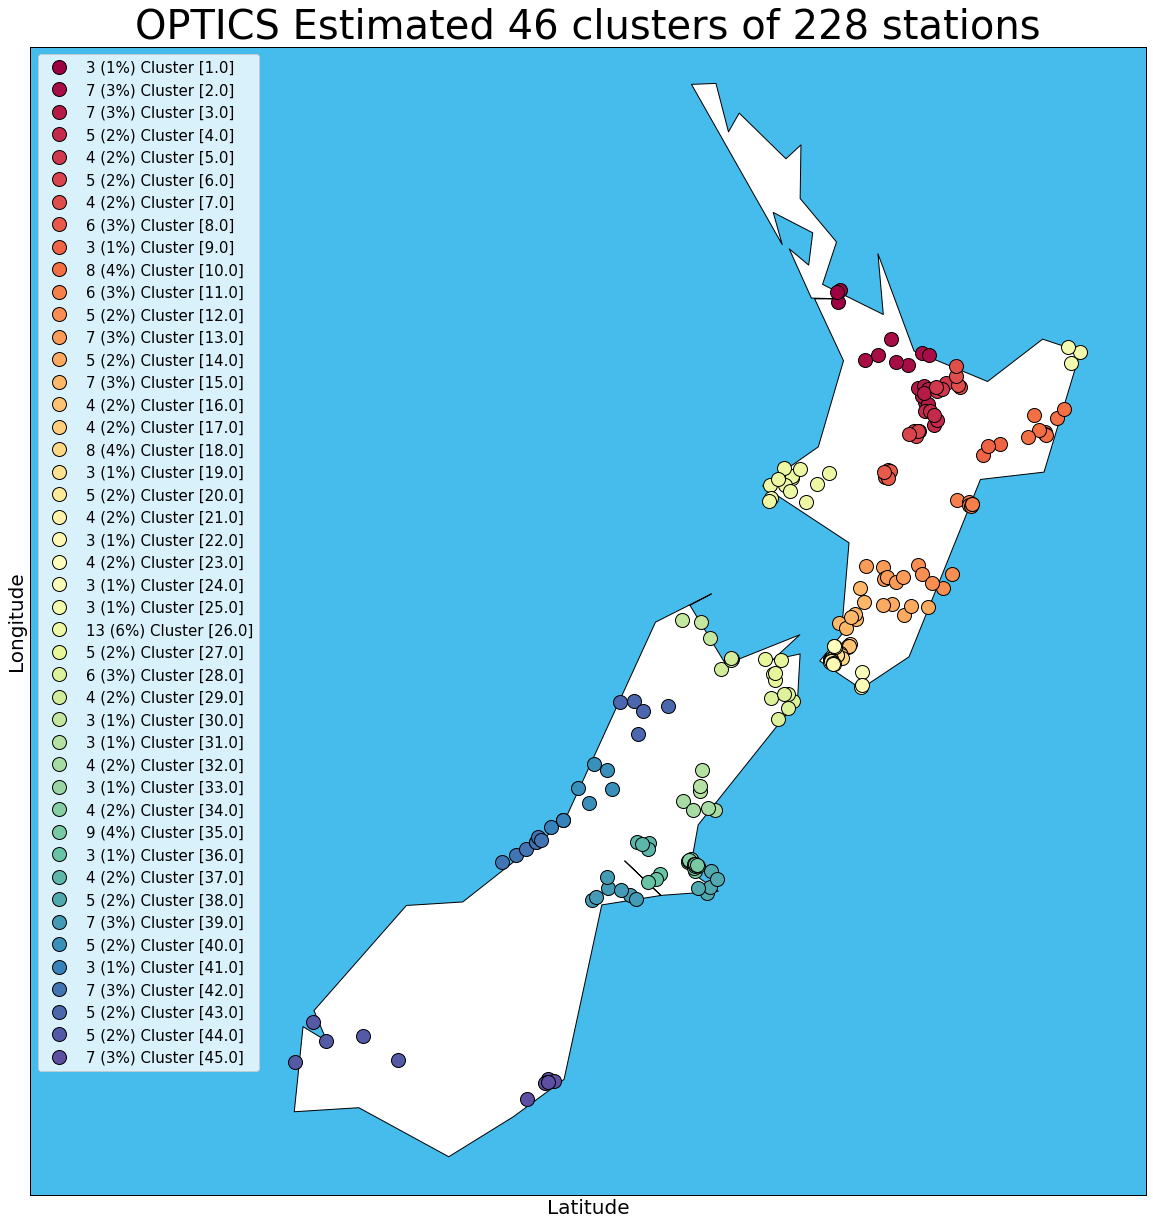

In [31]:
''' Plot clusters on a map '''
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

tmp_arr = np.insert(station_coordinates,2,labels, axis=1)
no_noise_st_arr = np.array([x for i,x in enumerate(tmp_arr) if np.any(tmp_arr[i][2] > 0)])
noise_st_arr = np.array([x for i,x in enumerate(tmp_arr) if np.any(tmp_arr[i][2] < 0)])

# create map using BASEMAP
#st_lat = [x[0] for x in no_noise_st_arr]
#st_lon = [x[1] for x in no_noise_st_arr]
st_lat = no_noise_st_arr[:,0]
st_lon = no_noise_st_arr[:,1]

lat_min = min(st_lat) - 1
lat_max = max(st_lat) + 3
lon_min = min(st_lon) - 4
lon_max = max(st_lon) + 1

plt.figure(figsize=(20, 35))
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'c',
            area_thresh=10000.,
           )
    
m.drawcoastlines()
m.drawcountries()
#m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')

unique_labels = set(no_noise_st_arr[:,2])
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
#plt.figure(figsize=(15,20))
for k, col in zip(unique_labels, colors):
    xy = np.array([x for i,x in enumerate(no_noise_st_arr) if np.any(no_noise_st_arr[i][2] == k)])
    s_legend = str(len(xy))+' ('+str(round(100*len(xy)/len(no_noise_st_arr)))+'%) Cluster ['+str(k)+']'
    x,y = m(xy[:, 1], xy[:, 0])
    m.plot(x, y, 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14, label=s_legend)

''' TODO add legend '''
plt.title('%s Estimated %d clusters of %d stations' 
          % (s_clust_name, n_clusters_, no_noise_st_arr.shape[0]), fontsize=40)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('Latitude', fontsize=20)
plt.ylabel('Longitude', fontsize=20)
plt.show()



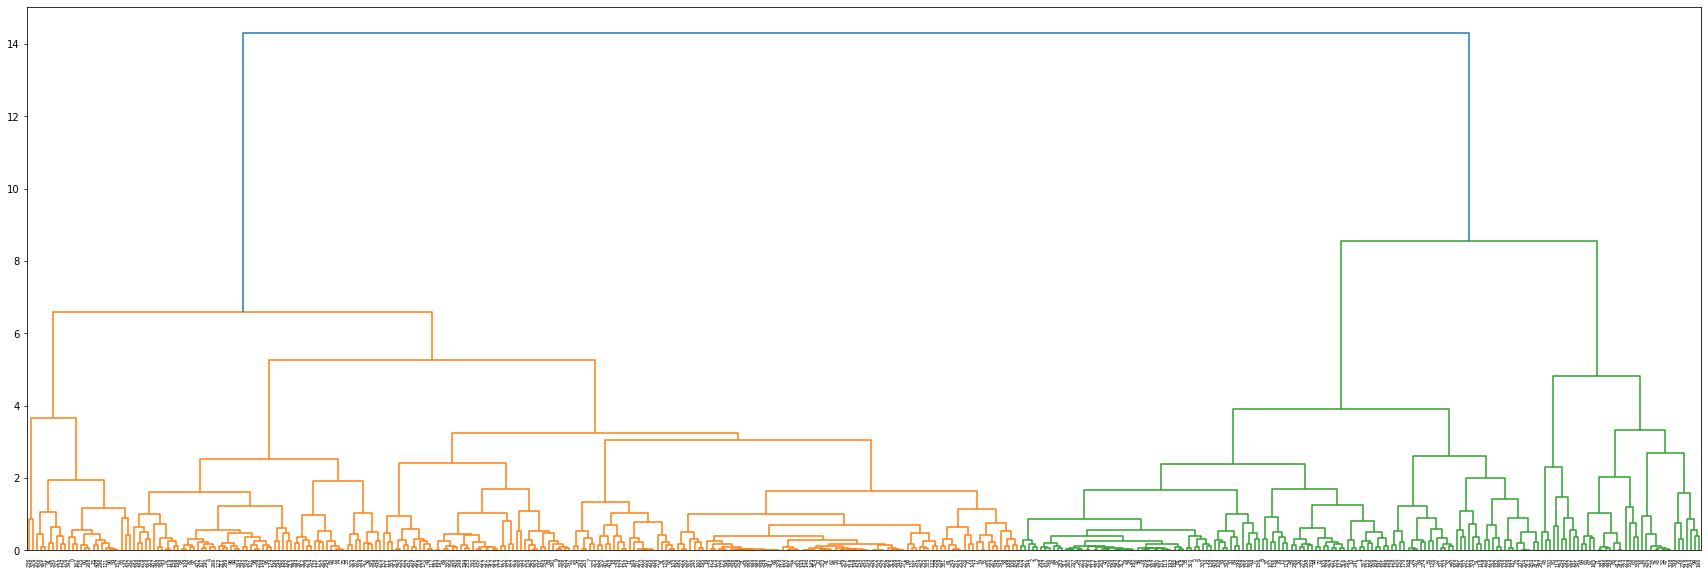

In [102]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
#X = locations_in_RI[['Latitude', 'Longitude']].values
Z = linkage(station_coordinates,
            method='complete',  # dissimilarity metric: max distance across all pairs of 
                                # records between two clusters
            metric='euclidean'
    )                           # you can peek into the Z matrix to see how clusters are 
                                # merged at each iteration of the algorithm

# calculate full dendrogram and visualize it
plt.figure(figsize=(30, 10))
dendrogram(Z)
plt.show()

# retrive clusters with `max_d`
from scipy.cluster.hierarchy import fcluster
max_d = 30       # I assume that your `Latitude` and `Longitude` columns are both in 
                 # units of miles
clusters = fcluster(Z, max_d, criterion='distance')

In [39]:
''' DEPRACATED PLOT DBSCAN results on a map '''
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(30, 40))
#nz_map = Basemap(width=15000,height=15000,projection='merc',
#            resolution='l',lat_0=-40,lon_0=176.)
#nz_map.drawcoastlines()

# Black removed and is used for noise instead.

#        _core_samples_mask = np.zeros_like(clusterer.labels_, dtype=bool)
#        _core_samples_mask[clusterer.core_sample_indices_] = True


unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = station_coordinates[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    ''' Uncomment to plot the DBSCAN noise '''
    #xy = station_coordinates[class_member_mask & ~core_samples_mask]
    #plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
    #         markeredgecolor='k', markersize=6)

''' TODO add legend '''
plt.title('Estimated %d clusters' % n_clusters_, fontsize=40)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(loc='upper left', fontsize=20)
plt.xlabel('Latitude', fontsize=30)
plt.ylabel('Longitude', fontsize=30)
plt.show()

NameError: name 'core_samples_mask' is not defined

<Figure size 2160x2880 with 0 Axes>

### Reachability

What is [reachability](https://www.geeksforgeeks.org/ml-dbscan-reachability-and-connectivity/) in clustering - An object (or instance) q is directly density reachable from object p if q is within the ε-Neighborhood of p and p is a core object.

Density connectivity: Object q is density-connected to object p w.r.t ε and MinPts if there is an object o such that both p and q are density-reachable from o w.r.t ε and MinPts.


In [7]:
from matplotlib.pyplot import figure

figure(figsize=(15,10))
cls_clust.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                            edge_alpha=0.6,
                                            node_size=10,
                                            edge_linewidth=2)
#clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
#                                      edge_alpha=0.6, 
#                                      node_size=10, 
#                                      edge_linewidth=2)

AttributeError: 'cluster_data' object has no attribute 'minimum_spanning_tree_'

<Figure size 1080x720 with 0 Axes>

/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

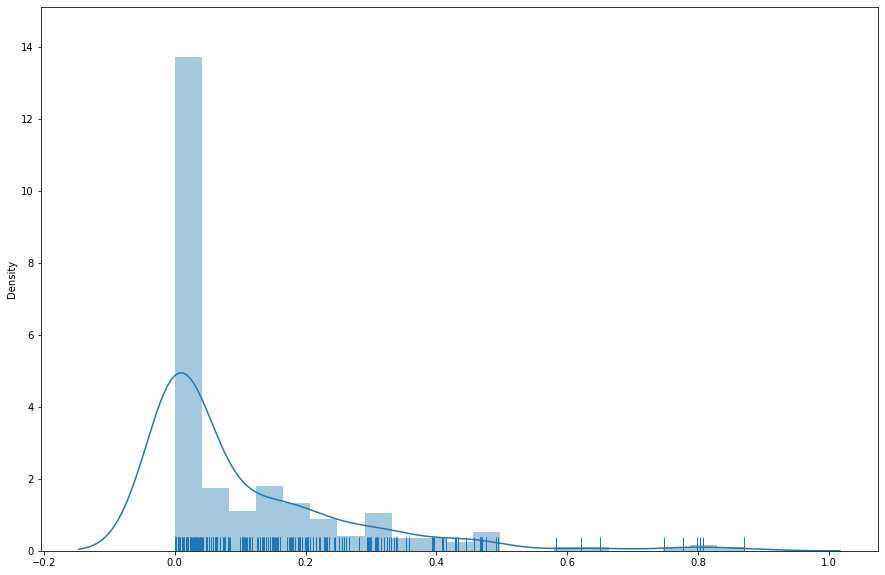

In [21]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(15,10))
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)

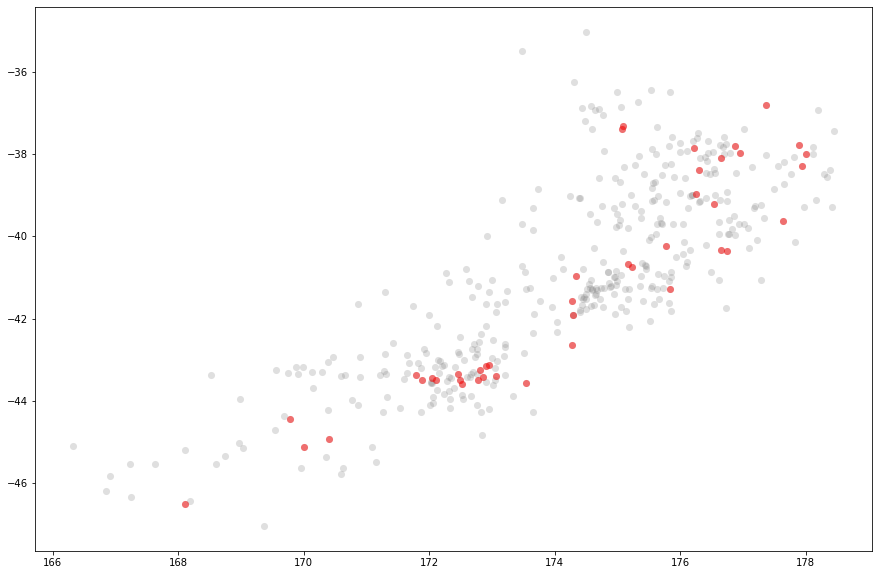

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
plt.scatter(*X.T, s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(*X[outliers].T, s=50, linewidth=0, c='red', alpha=0.5)

In [29]:
pal = sns.color_palette('deep', 8)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
plt.scatter(station_coordinates.T[0], station_coordinates.T[1], c=colors, **plot_kwds);

IndexError: list index out of range

In [2]:
from matplotlib.pyplot import figure

figure(figsize=(15,10))
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

NameError: name 'clusterer' is not defined

<Figure size 1080x720 with 0 Axes>

### Parametric analysis of the clusters

A large propotion of the sensors could be clustered to have, at least, 03 senors in a cluster and that they are < 30Km distance from each other; which also is the basis for the ```eps = 30.0/6371.0088``` (epsilon convereted to radians using the length of Earth's radius 6371Km). The estimated number of _noise points_ tell us the number of sensors that didn't belong to any cluster. The particular geodedic data cannot be clustered with KD-Trees or any Tree algorithm. However, chosing ```algorithm = "ball_tree"``` is recommended as it is well suited for geospatial data clustering. The ```metric = "haversine"``` is naturally required to calculate the distance between two geographical points. Finally, the ```st_dbscan_arr``` comprising latitude and longitude decimal data is converted to radians to be consistent with using the _haversine_ distance funcation.

### Voronoi diagram of the Station Clusters
A [Voronoi diagram is a collection of polygons](https://towardsdatascience.com/how-to-create-voronoi-regions-with-geospatial-data-in-python-adbb6c5f2134) with all the points on a plane that is closest to the single object - each polygon division correlates with a single object and contains all points which are closest to this single object.

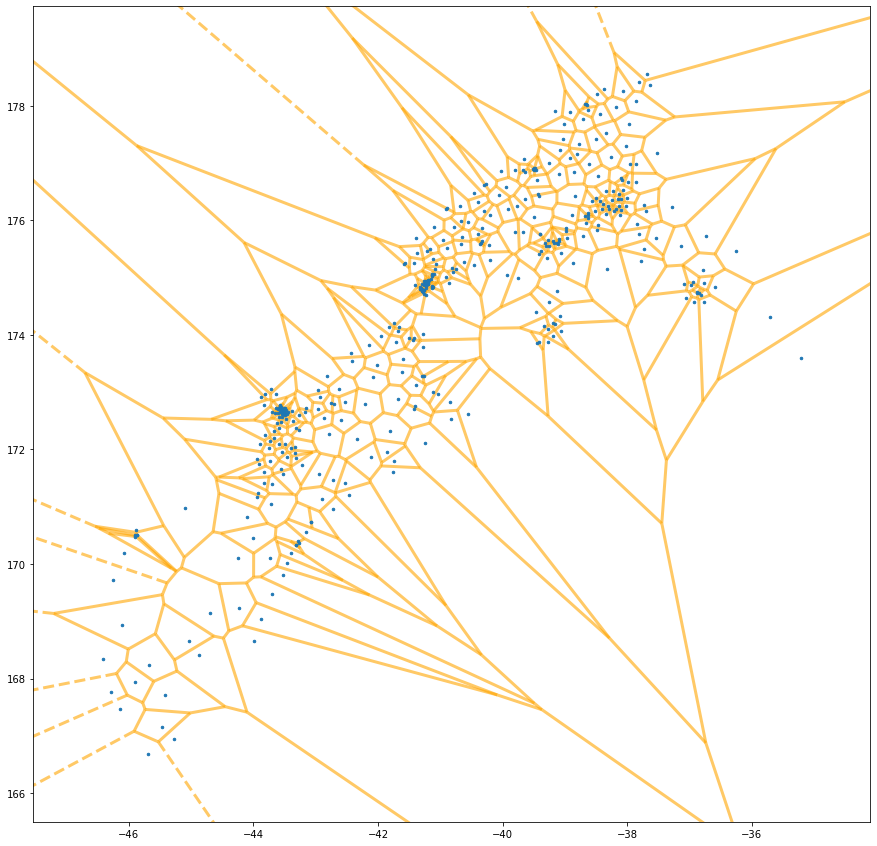

In [6]:
'''
    PLOT Voroni diagram of the stations
    TODO put inside geographic boundary
'''
from scipy.spatial import Voronoi, voronoi_plot_2d
#arr_clust_coords = np.array([[row[0],row[6]] for row in l_st_flt_clust])
#print([labels[:],scaled_features[:, 0], scaled_features[:, 1]])
#arr_coord = np.array(list([row[2][0],row[2][1]] for row in station_coordinates))
vor = Voronoi(station_coordinates)
#fig = voronoi_plot_2d(vor)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', 
                      line_width=3, line_alpha=0.6, point_size=5)
fig.set_size_inches(15,15)
#plt.axis("equal")
#plt.xlim

### Mean Nearest Neighbour Distance Statistics

Compute the mean distance between nearest neigbours of a minimum 3 points
* https://scikit-learn.org/stable/modules/neighbors.html
* https://pysal.org/notebooks/explore/pointpats/distance_statistics.html#Mean-Nearest-Neighbor-Distance-Statistics

In [27]:
''' NOT WORKING maybe redundant '''
from sklearn.neighbors import NearestNeighbors

# Augment station array with cluster number
# Start a new station coorinates and details tuple
st_list = []
i=0
for i in range(len(labels)):
    st_row = [tmp_arr[i,0],labels[i],tmp_arr[i,1],tmp_arr[i,2],tmp_arr[i,3]]
    st_list.append(list(st_row))

clusters = list({item[1] for item in st_list})

for each_cluster in clusters:
    cluster_list = list(st_list[j] for j in range(len(st_list)) if st_list[j][1] == each_cluster)
    cluster_arr = np.delete(cluster_list, [0,1,4],axis=1).astype(np.float)
    nbrs = NearestNeighbors(n_neighbors=3, algorithm='brute', metric='haversine').fit(cluster_arr)
    distances, indices = nbrs.kneighbors(cluster_arr)
    print(nbrs.kneighbors_graph(cluster_arr).toarray())
    
    each_cluster_clique = client.get_stations(latitude=-42.693,longitude=173.022,maxradius=30.0/6371.0, starttime = "2016-11-13 11:05:00.000",endtime = "2016-11-14 11:00:00.000")
    print(each_cluster_clique)
    _=inventory.plot(projection="local")
    
    break

sorted_rank = sorted(st_list, key=lambda i: (int(i[1])), reverse=True)
#print('Code, Cluster, Latitude, Longitude, Elevation')
#print(sorted_rank)

NameError: name 'tmp_arr' is not defined

### Discussion of DBSCAN results
It is evident from the cluster with large volume of data points are spread across the geography. Therefore, DBSCAN is shown to be innopriate for clustering stations to estimate whether they hold the property of being 30Km within each other.

Next we 

### Fault line coordinates

We have completed objective 1.A. However, we will also include a mapping of the fault lines to give a perception of the station distribution relative to that of the map of fault lines. 

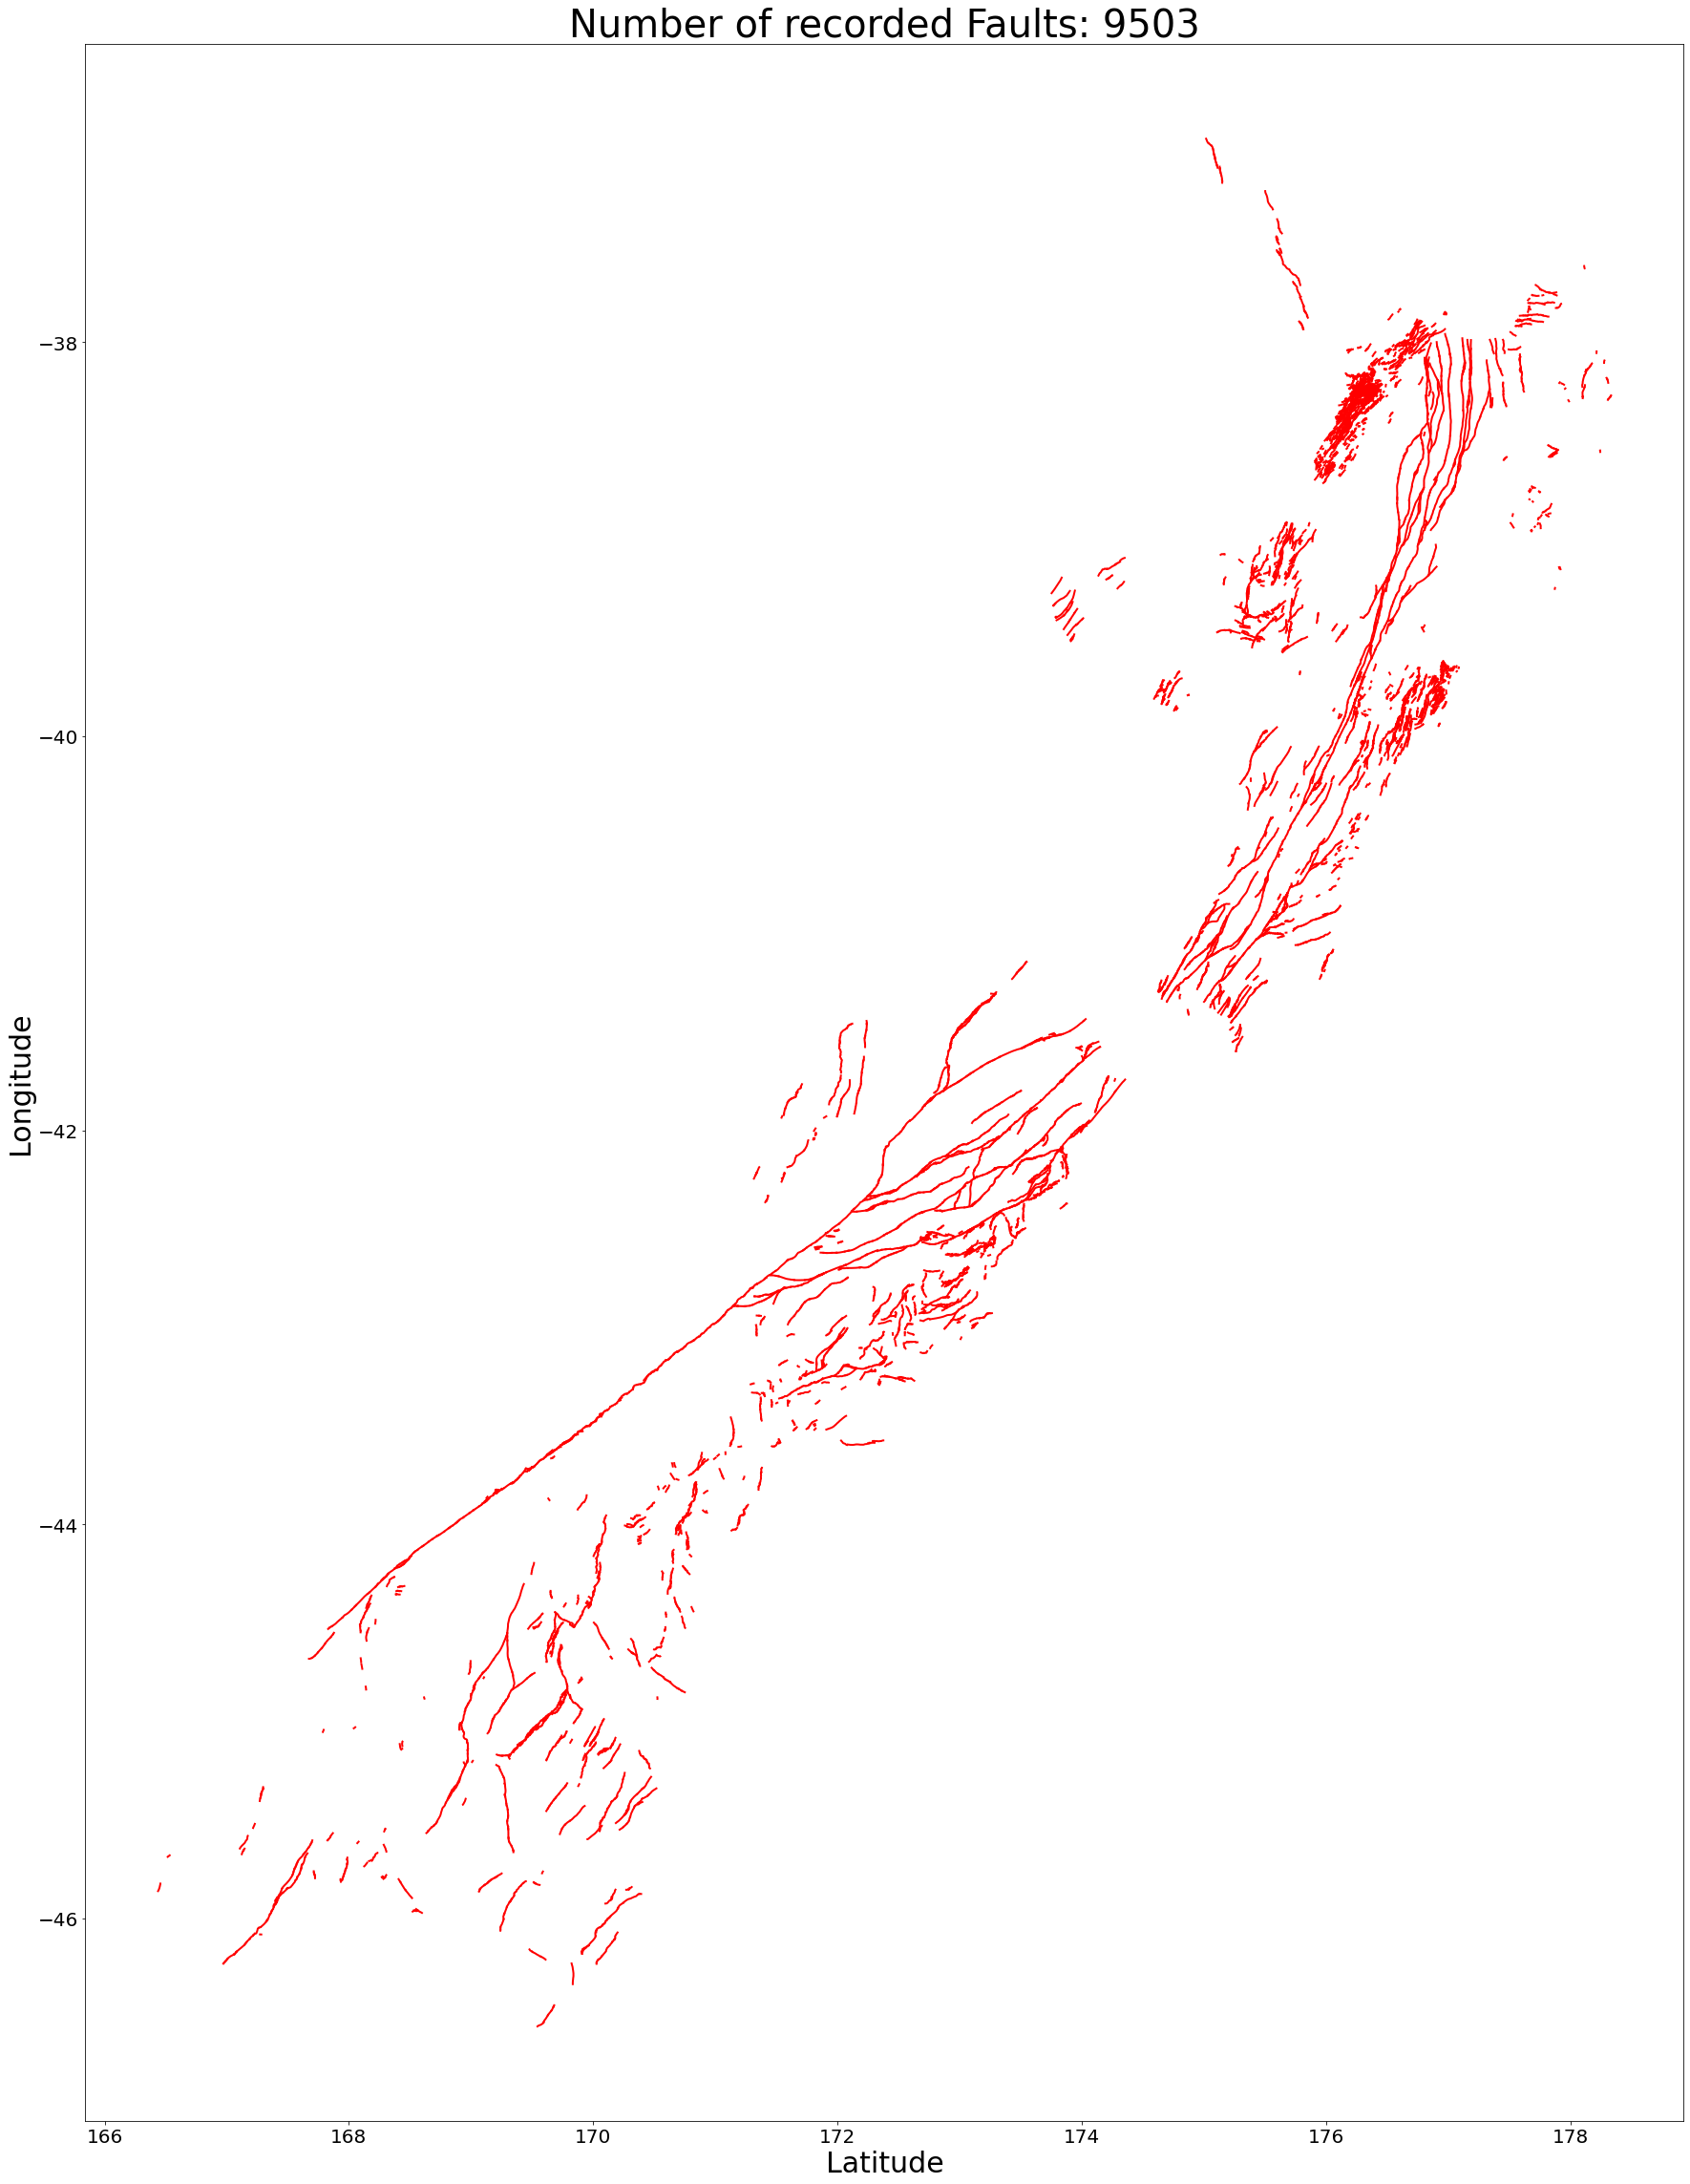

In [31]:
import matplotlib.pyplot as plt 
import json
from dictor import dictor

plt.figure(figsize=(30, 40))

'''Extract nested values from a JSON tree.'''

try:
    with open('/home/nuwan/workspace/quasar/data/NZAFD/JSON/NZAFD_Oct_2020_WGS84.json') as json_file: 
        data = json.load(json_file)

    for each_feature in range(len(data['features'])):
        points = {"x":[], "y":[]}
        path = dictor(data,'features.{}.geometry.paths.0'.format(each_feature))
        for each_coordinate in range(len(path)):
            points["x"].append(path[each_coordinate][0])
            points["y"].append(path[each_coordinate][1])
        plt.plot(points["x"],points["y"], color = 'red', linewidth=2, label="Faults")

    plt.title('Number of recorded Faults: %d' % len(data['features']), fontsize = 40)
    plt.xlabel('Latitude', fontsize=30)
    plt.ylabel('Longitude', fontsize=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
#    plt.legend(loc='upper left', fontsize=20)
    plt.show()
except Exception as err:
    print("Error message:", err)